## AMLDS Final Project Experiments

In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Imports

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import sklearn
import importlib



In [51]:
# importlib.reload(models)
# importlib.reload(utils)
# importlib.reload(utils.graph_utils)
# importlib.reload(visualization.plot_utils)
# importlib.reload(main)

import models
import utils
import utils.graph_utils
import visualization.plot_utils
import main

from models import DeGrootThresholdModel
from utils import add_random_edges, assign_edge_weights
from utils.graph_utils import create_sbm_graph, create_random_geometric_graph
from visualization.plot_utils import plot_network, plot_posting_heatmap
from main import run_experiment


## Example experiment

### Build a graph

Random geometric

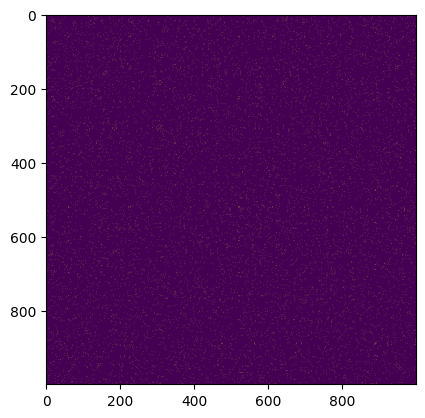

In [52]:
G = create_random_geometric_graph(
        n=1000,  # number of nodes
        radius=0.06 # radius for connection
    )
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

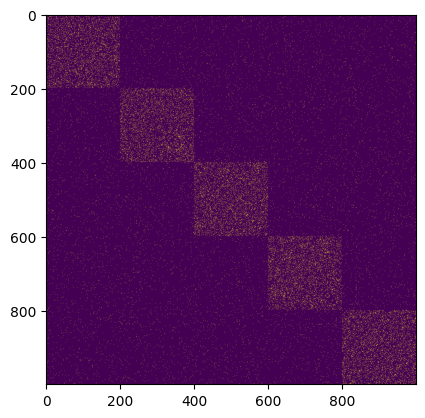

In [53]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # sizes of communities
    p_intra=0.1,                    # probability within communities
    p_inter=0.01                     # probability between communities
)
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

### Run DeGroot Model simulation on a given graph

Random geometric

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


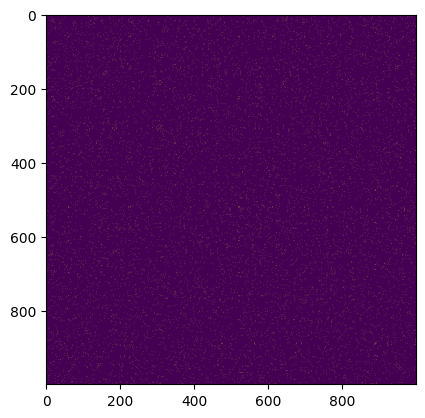

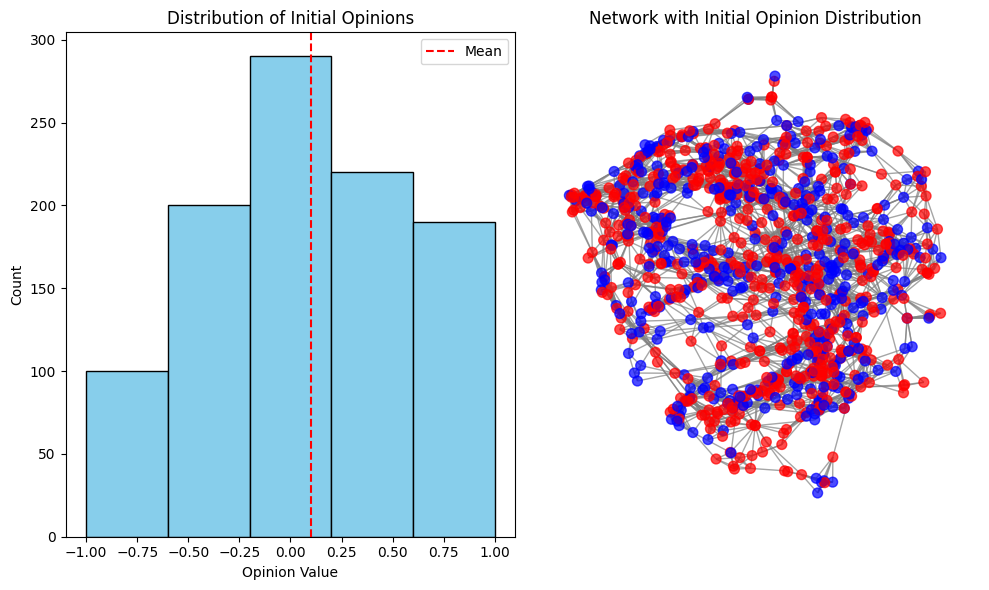

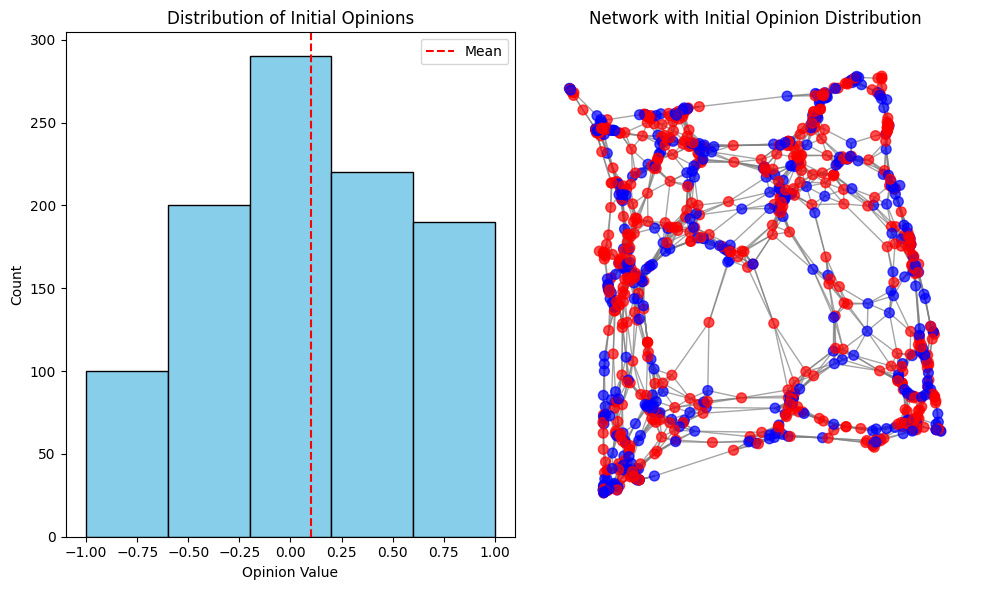

Is the graph connected? True
Are there self loops? False


In [54]:
G = create_random_geometric_graph(
        n=1000,  # number of nodes
        radius=0.06 # radius for connection
    )
plt.imshow(np.array(nx.adjacency_matrix(G).todense()))

# Some quick visualizations

model = DeGrootThresholdModel(G, local_agreement_threshold=0.6)

ispal_op = [-1, -.5, 0, .5, 1]
ispal_prop = [.1, .2, .29, .22, .19] # target 90/10

model.initialize_opinions_manual(
    initial_opinions=ispal_op,
    proportions=ispal_prop
)

model.visualize_distribution(layout='spring')
model.visualize_distribution(layout='spectral')

# Check if graph is connected - needs to be connected for DeGroot model
is_connected = nx.is_connected(G)
print(f"Is the graph connected? {is_connected}")

if not is_connected:
    # Get number of components
    components = list(nx.connected_components(G))
    print(f"Number of connected components: {len(components)}")
    print(f"Sizes of components: {[len(c) for c in components]}")

# Check for self loops
has_self_loops = nx.number_of_selfloops(G)
print("Are there self loops?", has_self_loops > 0)


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


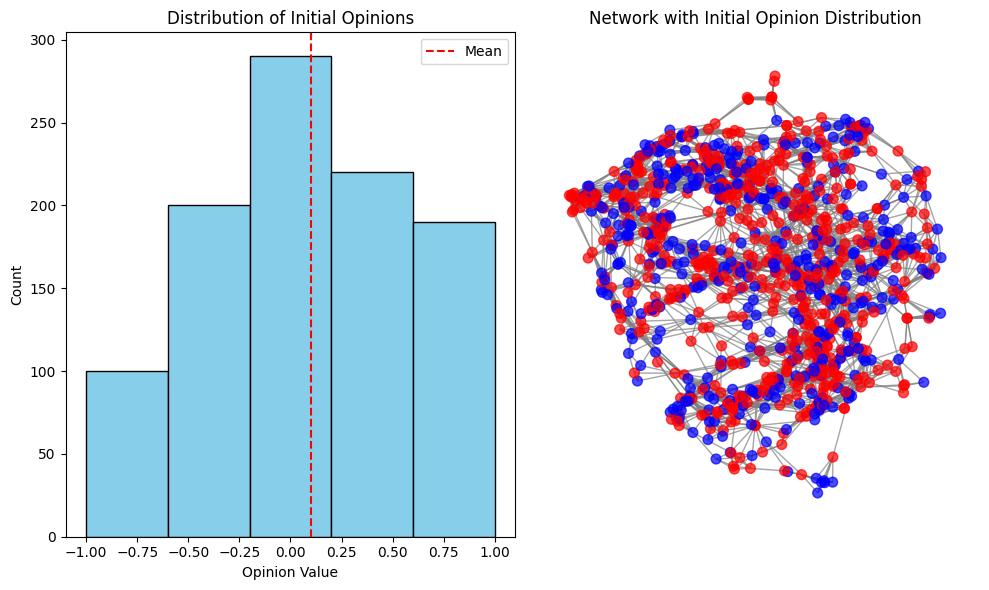

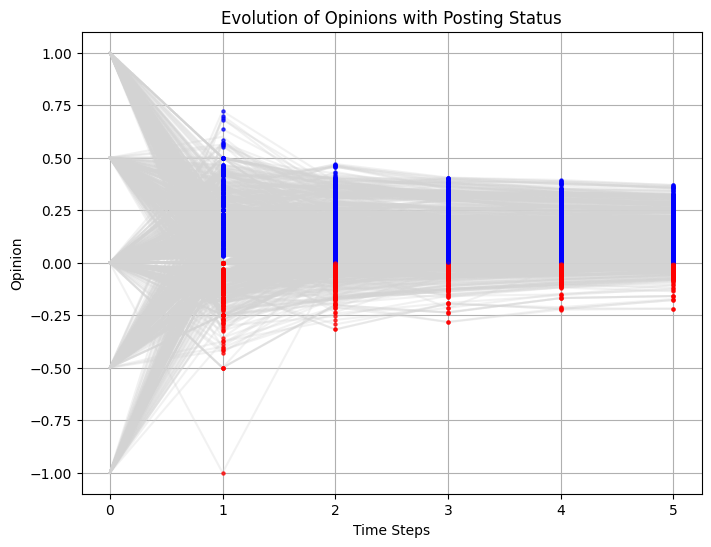

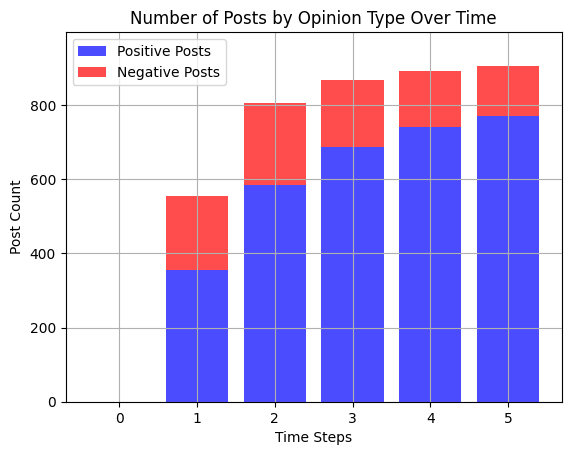

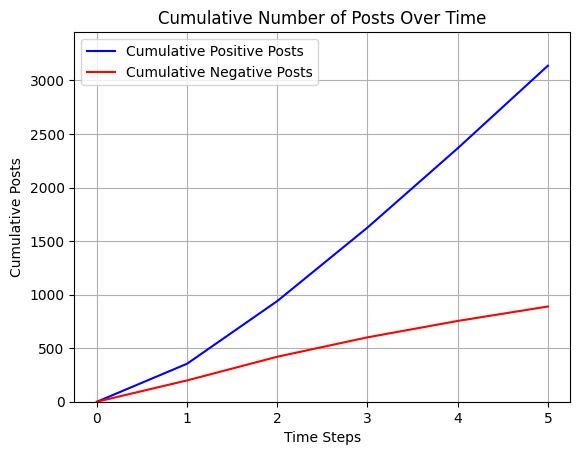

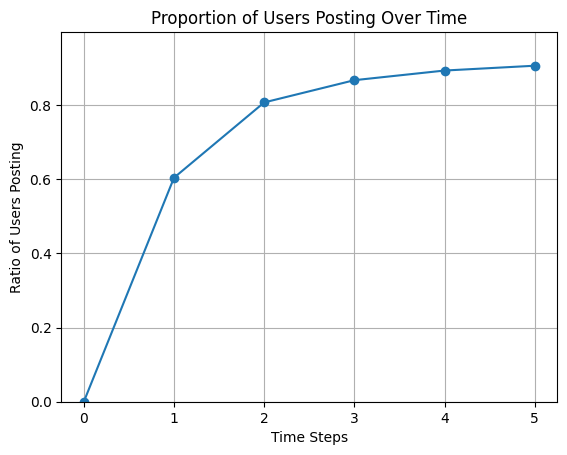

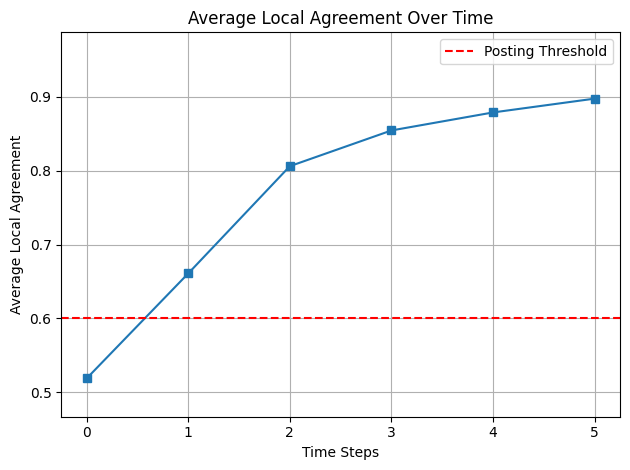

EXPERIMENT STATS:
Total posts: 4388
Positive posts: 3190 (0.73)
Negative posts: 1016 (0.23)
Overall pos/neg ratio: 3.14
Overall proportion of positive posts: 0.76
Variance in proportion of positive posts over time: 0.0073

Final opinion range: 0.5891
Final opinion variance: 0.0101
Final opinion std dev: 0.1004
Final average local agreement: 0.8975
Final local agreement variance: 0.0285


In [55]:
model = run_experiment(
    graph=G,
    threshold=0.6,
    steps=5,
    visualize=True
)

[0.057 0.058 0.059 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068
 0.069 0.07  0.071 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08
 0.081 0.082 0.083 0.084 0.085 0.086 0.087 0.088 0.089]
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 47273
Positive posts: 44833 (0.95)
Negative posts: 2237 (0.05)
Overall pos/neg ratio: 20.04
Overall proportion of positive posts: 0.95
Variance in proportion of positive posts over time: 0.0060

Final opinion range: 0.1960
Final opinion variance: 0.0010
Final opinion std dev: 0.0315
Final average local agreement: 0.9580
Final local agreement variance: 0.0143
Second largest eigenvalue: 0.9978
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportio

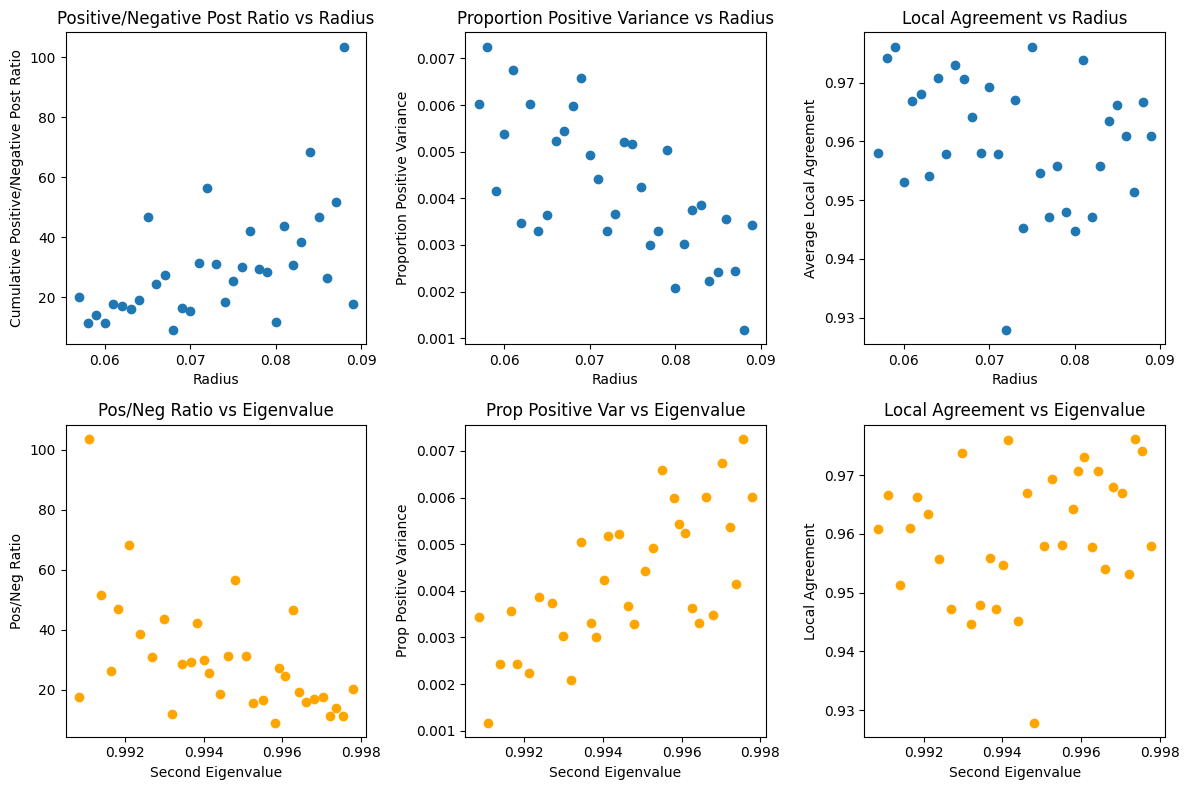

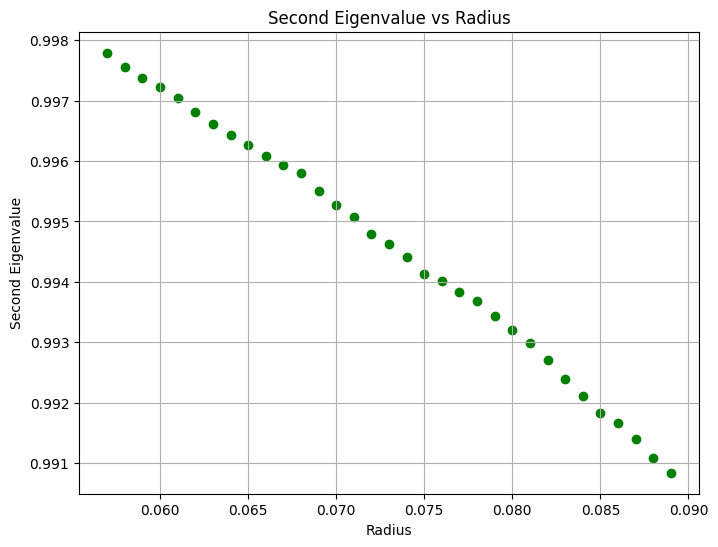

In [ ]:
# Create list of radii from 0.1 to 0.06 with steps of 0.01 - the critical radius is around 0.057
radii = np.arange(0.057, 0.09, 0.001)
print(radii) 
# Run experiments for different radii
results = []
for radius in radii:
    G = create_random_geometric_graph(
        n=1000,  # number of nodes 
        radius=radius
    )
    
    # Run experiment with visualization off to avoid clutter
    model, cumulative_pos_to_neg_ratio, proportion_positive_var, average_local_agreement, second_eigenvalue = run_experiment(
        graph=G,
        threshold=0.6,
        steps=50,
        visualize=False
    )
    
    results.append({
        'radius': radius,
        'cumulative_pos_to_neg_ratio': cumulative_pos_to_neg_ratio,
        'proportion_positive_var': proportion_positive_var,
        'local_agreement': average_local_agreement,
        'second_eigenvalue': second_eigenvalue
    })

# Create scatter plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Plot cumulative positive to negative ratio vs radius
radii_vals = [r['radius'] for r in results]
pos_neg_ratios = [r['cumulative_pos_to_neg_ratio'] for r in results]
ax1.scatter(radii_vals, pos_neg_ratios)
ax1.set_xlabel('Radius')
ax1.set_ylabel('Cumulative Positive/Negative Post Ratio')
ax1.set_title('Positive/Negative Post Ratio vs Radius')

# Plot proportion positive variance vs radius
prop_vars = [r['proportion_positive_var'] for r in results]
ax2.scatter(radii_vals, prop_vars)
ax2.set_xlabel('Radius')
ax2.set_ylabel('Proportion Positive Variance')
ax2.set_title('Proportion Positive Variance vs Radius')

# Plot local agreement vs radius
agreements = [r['local_agreement'] for r in results]
ax3.scatter(radii_vals, agreements)
ax3.set_xlabel('Radius')
ax3.set_ylabel('Average Local Agreement')
ax3.set_title('Local Agreement vs Radius')
# Plot metrics vs eigenvalue
eigenvals = [r['second_eigenvalue'] for r in results]
ax4.scatter(eigenvals, pos_neg_ratios, color='orange')
ax4.set_xlabel('Second Eigenvalue')
ax4.set_ylabel('Pos/Neg Ratio')
ax4.set_title('Pos/Neg Ratio vs Eigenvalue')

ax5.scatter(eigenvals, prop_vars, color='orange')
ax5.set_xlabel('Second Eigenvalue')
ax5.set_ylabel('Prop Positive Variance')
ax5.set_title('Prop Positive Var vs Eigenvalue')

ax6.scatter(eigenvals, agreements, color='orange')
ax6.set_xlabel('Second Eigenvalue')
ax6.set_ylabel('Local Agreement')
ax6.set_title('Local Agreement vs Eigenvalue')

plt.tight_layout()
plt.show()

# Plot radius vs eigenvalue
plt.figure(figsize=(8, 6))
plt.scatter(radii_vals, eigenvals, color='green')
plt.xlabel('Radius')
plt.ylabel('Second Eigenvalue') 
plt.title('Second Eigenvalue vs Radius')
plt.grid(True)
plt.show()


5-Block SBM

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


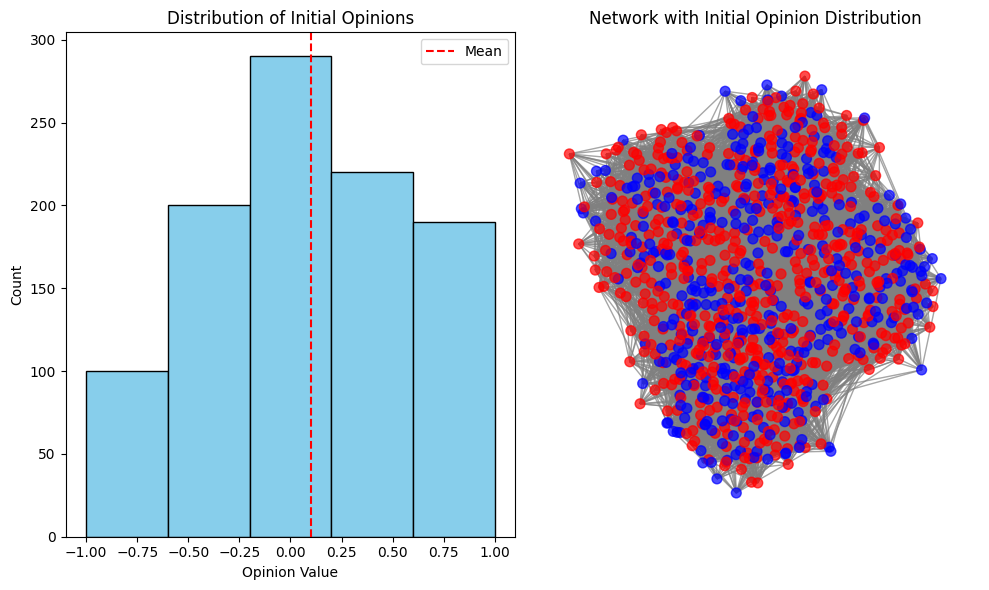

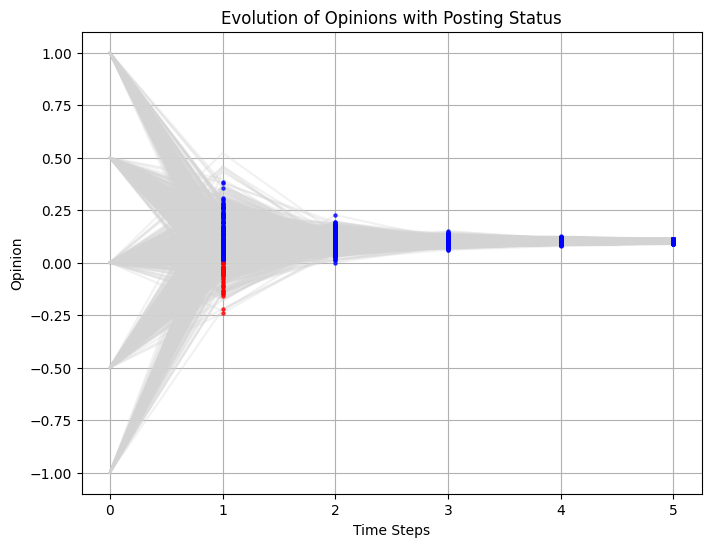

<string>:11: RuntimeWarning: invalid value encountered in scalar divide
<string>:12: RuntimeWarning: invalid value encountered in scalar divide
<string>:11: RuntimeWarning: divide by zero encountered in scalar divide


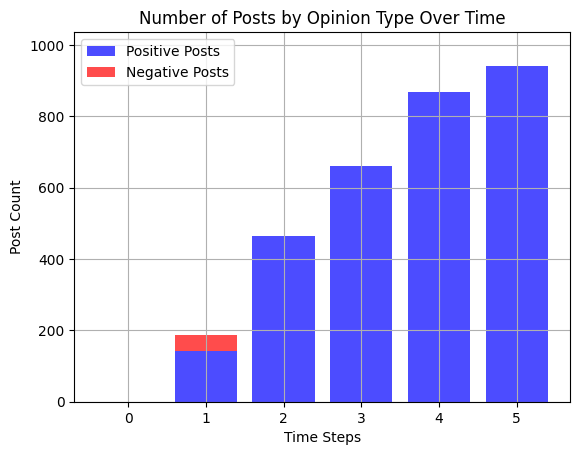

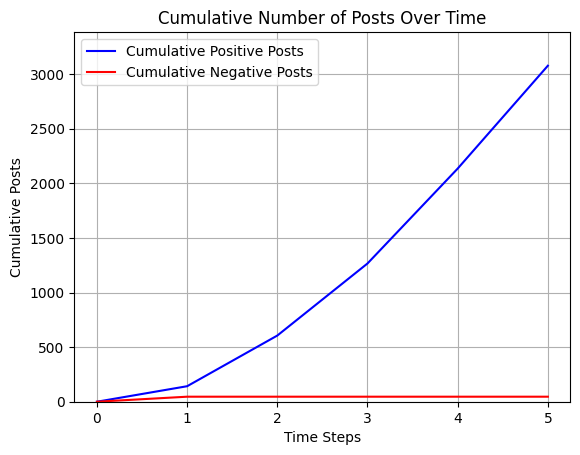

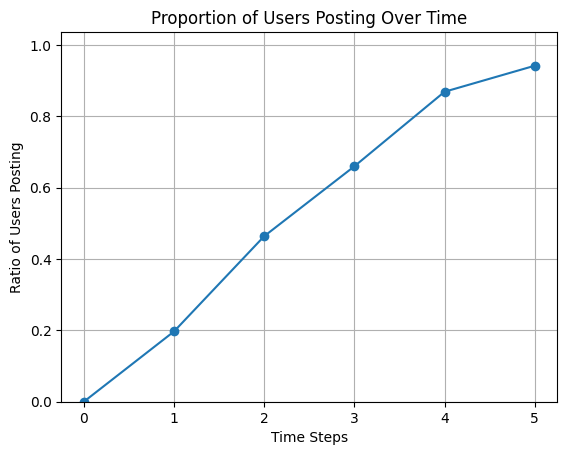

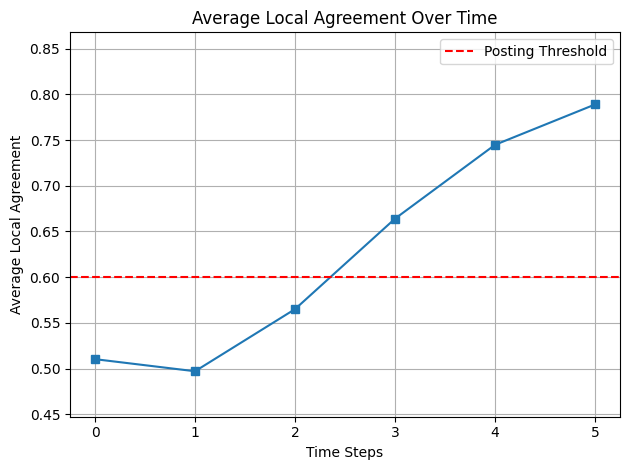

EXPERIMENT STATS:
Total posts: 3388
Positive posts: 3084 (0.91)
Negative posts: 182 (0.05)
Overall pos/neg ratio: 16.95
Overall proportion of positive posts: 0.94
Variance in proportion of positive posts over time: 0.0120

Final opinion range: 0.0269
Final opinion variance: 0.0000
Final opinion std dev: 0.0056
Final average local agreement: 0.7889
Final local agreement variance: 0.0175
Second largest eigenvalue: 0.6837


In [62]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # sizes of communities
    p_intra=0.1,                    # probability within communities
    p_inter=0.01                     # probability between communities
)

model = run_experiment(
    graph=G,
    threshold=0.6,
    steps=5, 
    visualize=True
)

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 48097
Positive posts: 47761 (0.99)
Negative posts: 189 (0.00)
Overall pos/neg ratio: 252.70
Overall proportion of positive posts: 1.00
Variance in proportion of positive posts over time: 0.0006

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.8283
Final local agreement variance: 0.0075
Second largest eigenvalue: 0.6837
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 47630
Positive posts: 47336 (0.99)
Negative posts: 166 (0.00)
Overall pos/neg ratio: 285.16
Overall proportion of positive posts: 1

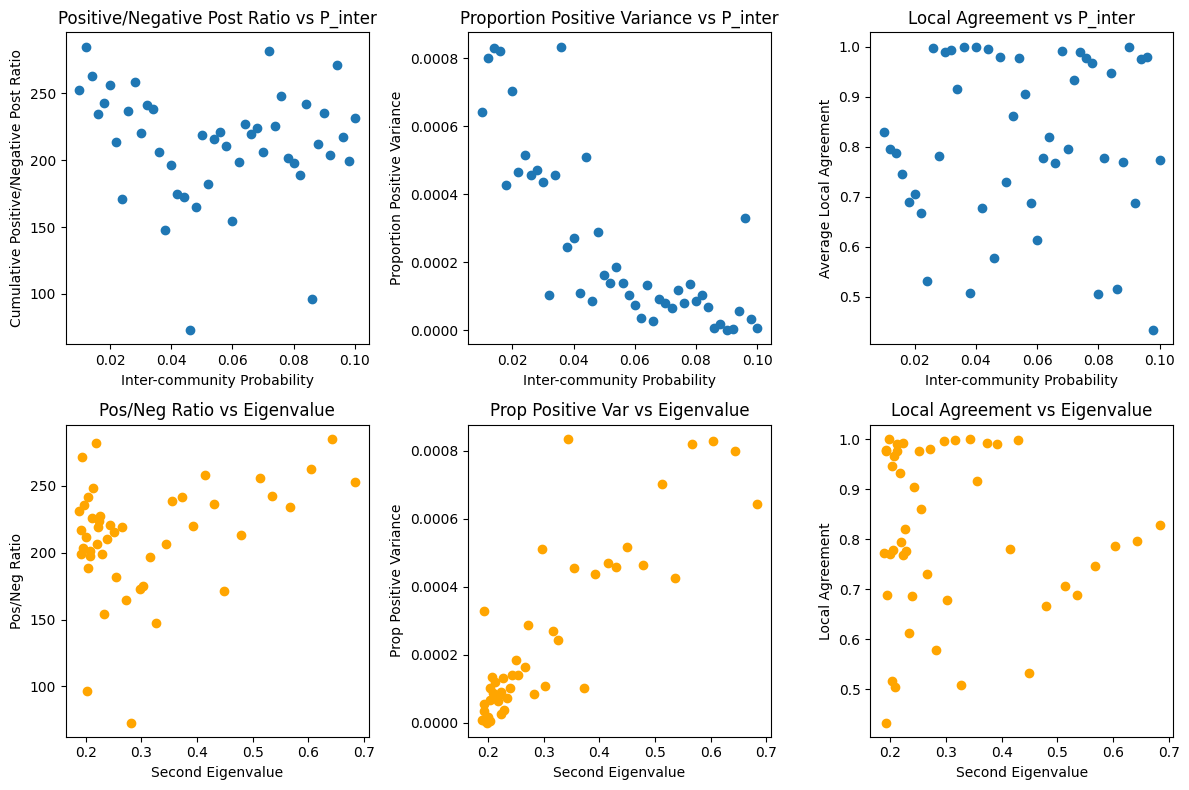

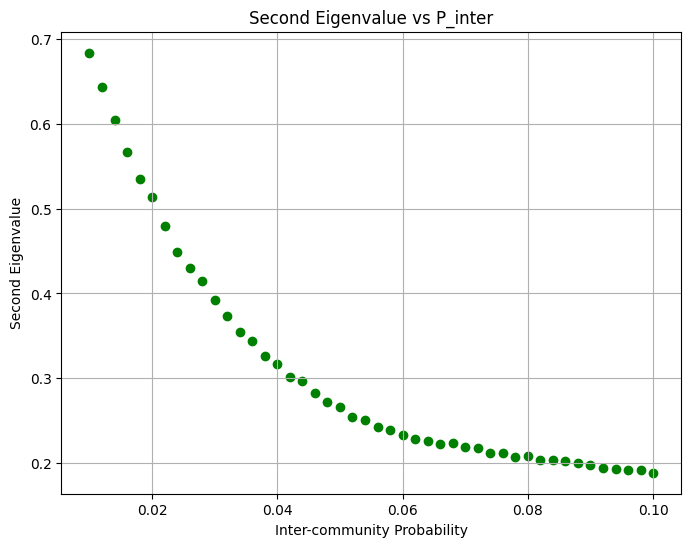

In [80]:
# Create list of inter-community probabilities from 0.01 to 0.05
p_inters = np.arange(0.01, .1, 0.002)

# Run experiments for different inter-community probabilities
results = []
for p_inter in p_inters:
    G = create_sbm_graph(
        sizes=[200, 200, 200, 200, 200],  # 5 equal-sized communities
        p_intra=0.1,                      # fixed intra-community probability
        p_inter=p_inter                    # varying inter-community probability
    )
    
    # Run experiment with visualization off to avoid clutter
    model, cumulative_pos_to_neg_ratio, proportion_positive_var, average_local_agreement, second_eigenvalue = run_experiment(
        graph=G,
        threshold=0.6,
        steps=50,
        visualize=False
    )
    
    results.append({
        'p_inter': p_inter,
        'cumulative_pos_to_neg_ratio': cumulative_pos_to_neg_ratio,
        'proportion_positive_var': proportion_positive_var,
        'local_agreement': average_local_agreement,
        'second_eigenvalue': second_eigenvalue
    })

# Create scatter plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Plot cumulative positive to negative ratio vs p_inter
p_inter_vals = [r['p_inter'] for r in results]
pos_neg_ratios = [r['cumulative_pos_to_neg_ratio'] for r in results]
ax1.scatter(p_inter_vals, pos_neg_ratios)
ax1.set_xlabel('Inter-community Probability')
ax1.set_ylabel('Cumulative Positive/Negative Post Ratio')
ax1.set_title('Positive/Negative Post Ratio vs P_inter')

# Plot proportion positive variance vs p_inter
prop_vars = [r['proportion_positive_var'] for r in results]
ax2.scatter(p_inter_vals, prop_vars)
ax2.set_xlabel('Inter-community Probability')
ax2.set_ylabel('Proportion Positive Variance')
ax2.set_title('Proportion Positive Variance vs P_inter')

# Plot local agreement vs p_inter
agreements = [r['local_agreement'] for r in results]
ax3.scatter(p_inter_vals, agreements)
ax3.set_xlabel('Inter-community Probability')
ax3.set_ylabel('Average Local Agreement')
ax3.set_title('Local Agreement vs P_inter')

# Plot metrics vs eigenvalue
eigenvals = [r['second_eigenvalue'] for r in results]
ax4.scatter(eigenvals, pos_neg_ratios, color='orange')
ax4.set_xlabel('Second Eigenvalue')
ax4.set_ylabel('Pos/Neg Ratio')
ax4.set_title('Pos/Neg Ratio vs Eigenvalue')

ax5.scatter(eigenvals, prop_vars, color='orange')
ax5.set_xlabel('Second Eigenvalue')
ax5.set_ylabel('Prop Positive Variance')
ax5.set_title('Prop Positive Var vs Eigenvalue')

ax6.scatter(eigenvals, agreements, color='orange')
ax6.set_xlabel('Second Eigenvalue')
ax6.set_ylabel('Local Agreement')
ax6.set_title('Local Agreement vs Eigenvalue')

plt.tight_layout()
plt.show()

# Plot p_inter vs eigenvalue
plt.figure(figsize=(8, 6))
plt.scatter(p_inter_vals, eigenvals, color='green')
plt.xlabel('Inter-community Probability')
plt.ylabel('Second Eigenvalue')
plt.title('Second Eigenvalue vs P_inter')
plt.grid(True)
plt.show()


Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 34453
Positive posts: 34082 (0.99)
Negative posts: 223 (0.01)
Overall pos/neg ratio: 152.83
Overall proportion of positive posts: 0.99
Variance in proportion of positive posts over time: 0.0015

Final opinion range: 0.0000
Final opinion variance: 0.0000
Final opinion std dev: 0.0000
Final average local agreement: 0.7020
Final local agreement variance: 0.0191
Second largest eigenvalue: 0.5505
Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%
EXPERIMENT STATS:
Total posts: 40605
Positive posts: 40251 (0.99)
Negative posts: 202 (0.00)
Overall pos/neg ratio: 199.26
Overall proportion of positive posts: 1

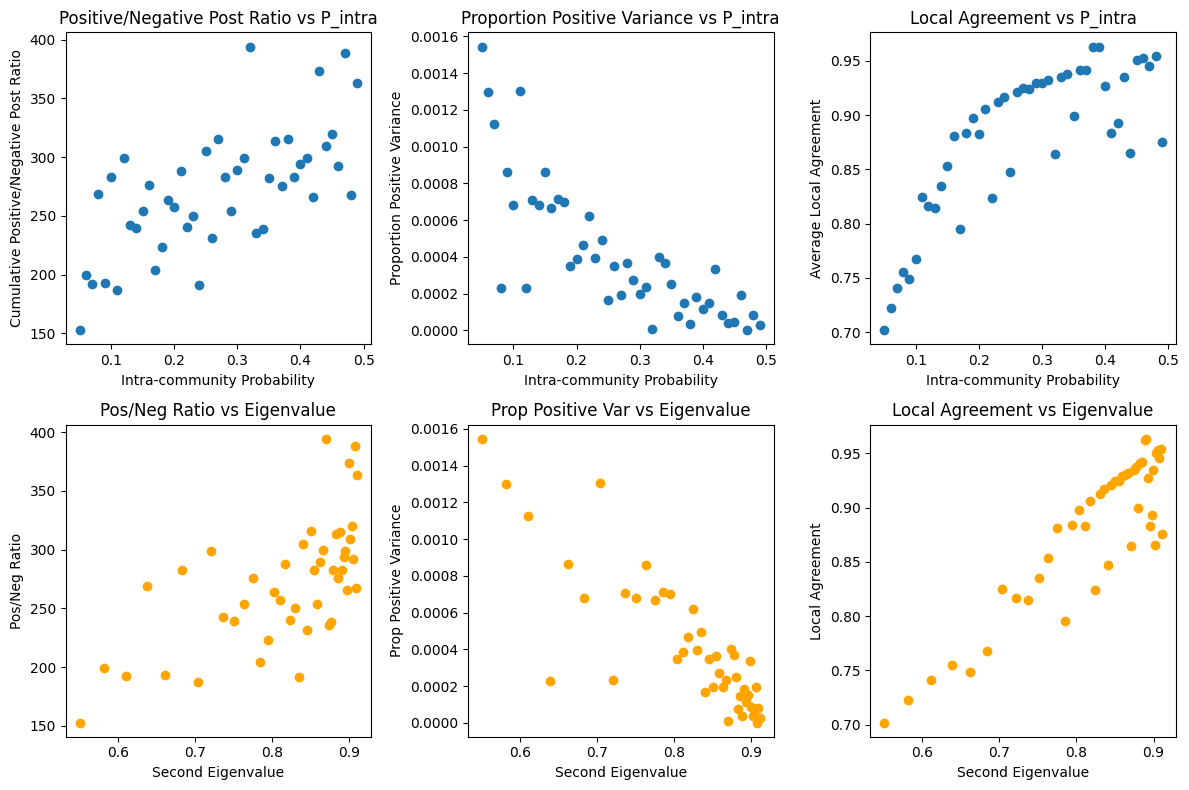

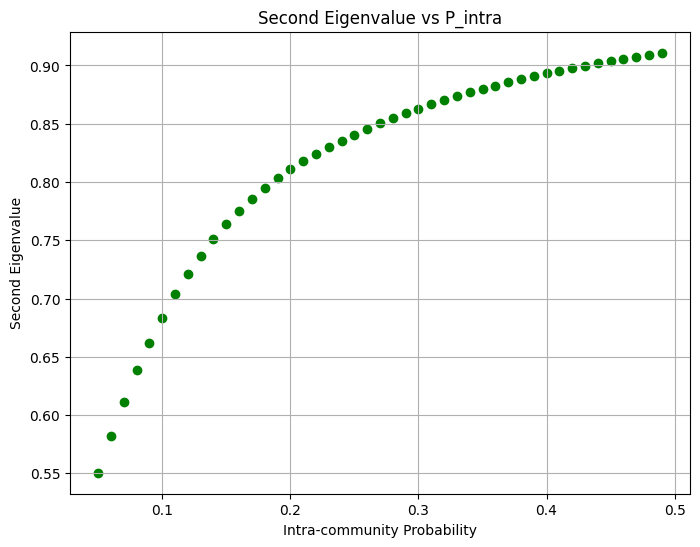

In [81]:
# Create list of intra-community probabilities from 0.1 to 0.5
p_intras = np.arange(0.05, 0.5, 0.01)

# Run experiments for different intra-community probabilities
results = []
for p_intra in p_intras:
    G = create_sbm_graph(
        sizes=[200, 200, 200, 200, 200],  # 5 equal-sized communities
        p_intra=p_intra,                  # varying intra-community probability
        p_inter=0.01                      # fixed inter-community probability
    )
    
    # Run experiment with visualization off to avoid clutter
    model, pos_to_neg_ratio, prop_pos_var, avg_local_agreement, second_eigenval = run_experiment(
        graph=G,
        threshold=0.6,
        steps=50,
        visualize=False
    )
    
    results.append({
        'p_intra': p_intra,
        'pos_to_neg_ratio': pos_to_neg_ratio,
        'proportion_positive_var': prop_pos_var,
        'local_agreement': avg_local_agreement,
        'second_eigenvalue': second_eigenval
    })

# Create scatter plots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Plot metrics vs p_intra
p_intra_vals = [r['p_intra'] for r in results]
pos_neg_ratios = [r['pos_to_neg_ratio'] for r in results]
prop_vars = [r['proportion_positive_var'] for r in results]
agreements = [r['local_agreement'] for r in results]
eigenvals = [r['second_eigenvalue'] for r in results]

ax1.scatter(p_intra_vals, pos_neg_ratios)
ax1.set_xlabel('Intra-community Probability')
ax1.set_ylabel('Cumulative Positive/Negative Post Ratio')
ax1.set_title('Positive/Negative Post Ratio vs P_intra')

ax2.scatter(p_intra_vals, prop_vars)
ax2.set_xlabel('Intra-community Probability')
ax2.set_ylabel('Proportion Positive Variance')
ax2.set_title('Proportion Positive Variance vs P_intra')

ax3.scatter(p_intra_vals, agreements)
ax3.set_xlabel('Intra-community Probability')
ax3.set_ylabel('Average Local Agreement')
ax3.set_title('Local Agreement vs P_intra')

# Plot metrics vs eigenvalue
ax4.scatter(eigenvals, pos_neg_ratios, color='orange')
ax4.set_xlabel('Second Eigenvalue')
ax4.set_ylabel('Pos/Neg Ratio')
ax4.set_title('Pos/Neg Ratio vs Eigenvalue')

ax5.scatter(eigenvals, prop_vars, color='orange')
ax5.set_xlabel('Second Eigenvalue')
ax5.set_ylabel('Prop Positive Variance')
ax5.set_title('Prop Positive Var vs Eigenvalue')

ax6.scatter(eigenvals, agreements, color='orange')
ax6.set_xlabel('Second Eigenvalue')
ax6.set_ylabel('Local Agreement')
ax6.set_title('Local Agreement vs Eigenvalue')

plt.tight_layout()
plt.show()

# Plot p_intra vs eigenvalue
plt.figure(figsize=(8, 6))
plt.scatter(p_intra_vals, eigenvals, color='green')
plt.xlabel('Intra-community Probability')
plt.ylabel('Second Eigenvalue')
plt.title('Second Eigenvalue vs P_intra')
plt.grid(True)
plt.show()


Build the best SBM based on the above (can't quite find best balance)

Initial opinion distribution:
  Positive opinions: 41.00%
  Negative opinions: 30.00%
  Neutral opinions: 29.00%
  Positive-to-negative ratio: 1.37
  Initial proportion of opinions on positive side: 57.75%


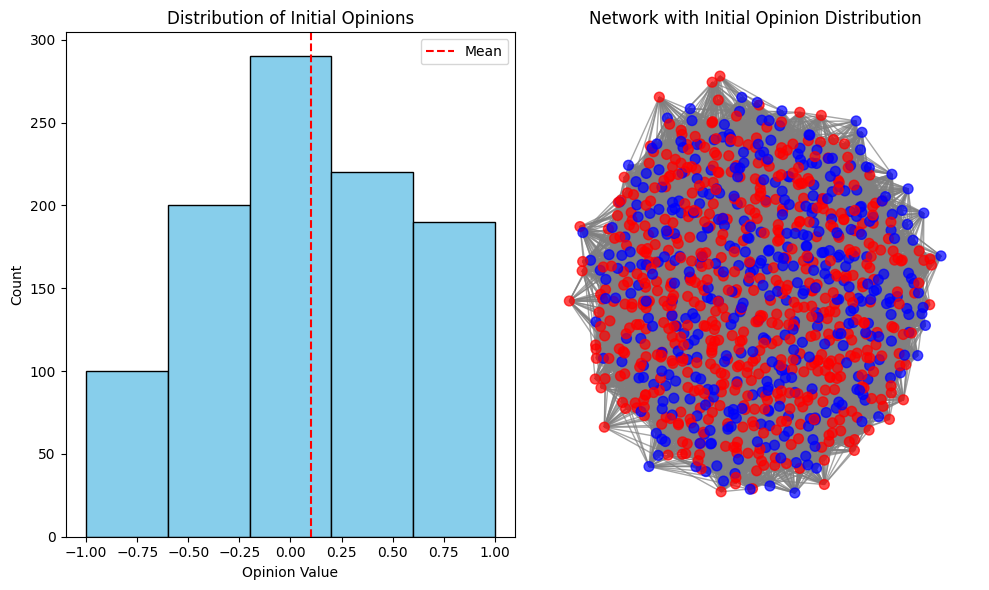

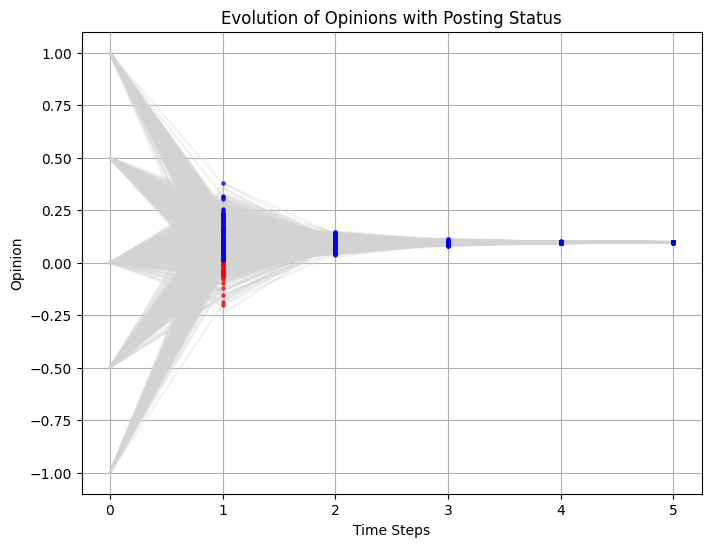

<string>:11: RuntimeWarning: invalid value encountered in scalar divide
<string>:12: RuntimeWarning: invalid value encountered in scalar divide
<string>:11: RuntimeWarning: divide by zero encountered in scalar divide


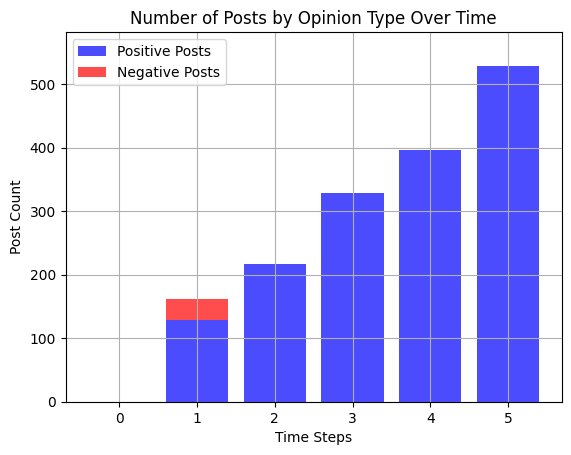

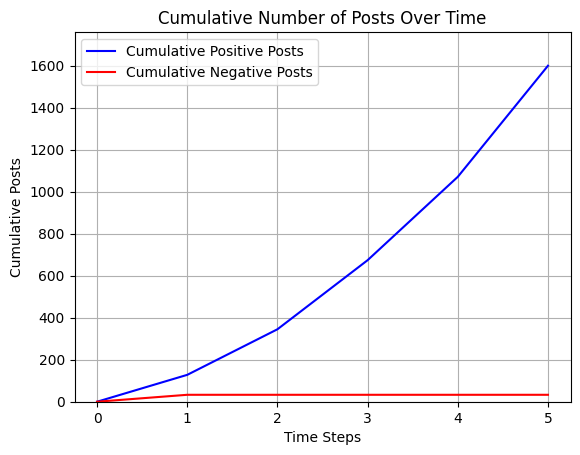

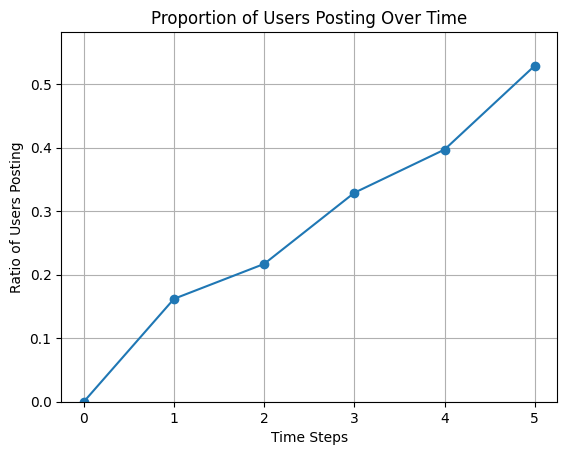

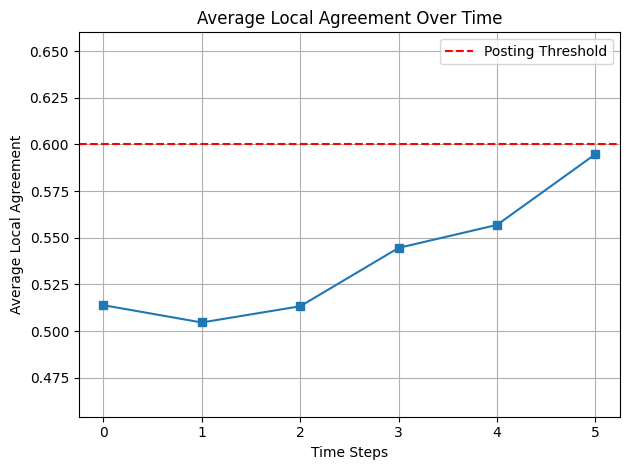

EXPERIMENT STATS:
Total posts: 1891
Positive posts: 1600 (0.85)
Negative posts: 161 (0.09)
Overall pos/neg ratio: 9.94
Overall proportion of positive posts: 0.91
Variance in proportion of positive posts over time: 0.0084

Final opinion range: 0.0027
Final opinion variance: 0.0000
Final opinion std dev: 0.0005
Final average local agreement: 0.5948
Final local agreement variance: 0.0189
Second largest eigenvalue: 0.3927


In [84]:
G = create_sbm_graph(
    sizes=[200, 200, 200, 200, 200],  # sizes of communities
    p_intra=0.1,                    # probability within communities
    p_inter=0.03                     # probability between communities
)

model = run_experiment(
    graph=G,
    threshold=0.6,
    steps=5, 
    visualize=True
)

### Remind true values for cumulative pos-neg ratio and variance proportion positice

In [101]:
ispal_post_df = pd.read_csv('data/ispal_counts.csv')

# Calculate total sums
total_pos_posts = ispal_post_df['Pro-Palestine'].sum()
print("\nTotal pro-Palestine posts:")
print(total_pos_posts)

total_neg_posts = ispal_post_df['Pro-Israel'].sum()
print("\nTotal pro-Israel posts:")
print(total_neg_posts)

# Calculate cumulative ratio of pro-Palestine to pro-Israel posts
pos_neg_ratio = total_pos_posts / total_neg_posts
print("\nCumulative ratio of pro-Palestine to pro-Israel posts over time:")
print(pos_neg_ratio)

# Calculate proportion of pro-Israel posts at each timestep
pos_props = ispal_post_df['Pro-Palestine'] / (ispal_post_df['Pro-Israel'] + ispal_post_df['Pro-Palestine'])

# Calculate variance of proportion positive posts
variance_pos_props = pos_props.var()
# Print variance in proportion of pro-Palestine posts over time
print(f"\n Variance in proportion of pro-Palestine posts: \n {variance_pos_props}")


Total pro-Palestine posts:
305065

Total pro-Israel posts:
31198

Cumulative ratio of pro-Palestine to pro-Israel posts over time:
9.778351176357459

 Variance in proportion of pro-Palestine posts: 
 0.048100776748750206


### Propose our model here and run additional experiment